In [106]:
# Install the necessary libraries
!pip install pandas numpy matplotlib seaborn scikit-learn


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


# Loading the Data

In [108]:
# Importing all necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [112]:
# Load the dataset
data = pd.read_csv(r"C:\Users\oviya\PortfolioProjects\CoffeeQualityPredictionModel\merged_data_cleaned.csv")
print(data.head())

# Renaming the unnamed column
data.rename(columns={'Unnamed: 0': 'Coffee_id'}, inplace=True)
data.columns.to_list()

   Unnamed: 0  Species                     Owner Country.of.Origin  \
0           0  Arabica                 metad plc          Ethiopia   
1           1  Arabica                 metad plc          Ethiopia   
2           2  Arabica  grounds for health admin         Guatemala   
3           3  Arabica       yidnekachew dabessa          Ethiopia   
4           4  Arabica                 metad plc          Ethiopia   

                                  Farm.Name Lot.Number       Mill ICO.Number  \
0                                 metad plc        NaN  metad plc  2014/2015   
1                                 metad plc        NaN  metad plc  2014/2015   
2  san marcos barrancas "san cristobal cuch        NaN        NaN        NaN   
3     yidnekachew dabessa coffee plantation        NaN    wolensu        NaN   
4                                 metad plc        NaN  metad plc  2014/2015   

                                 Company       Altitude  ...  Color  \
0      metad agricultural d

['Coffee_id',
 'Species',
 'Owner',
 'Country.of.Origin',
 'Farm.Name',
 'Lot.Number',
 'Mill',
 'ICO.Number',
 'Company',
 'Altitude',
 'Region',
 'Producer',
 'Number.of.Bags',
 'Bag.Weight',
 'In.Country.Partner',
 'Harvest.Year',
 'Grading.Date',
 'Owner.1',
 'Variety',
 'Processing.Method',
 'Aroma',
 'Flavor',
 'Aftertaste',
 'Acidity',
 'Body',
 'Balance',
 'Uniformity',
 'Clean.Cup',
 'Sweetness',
 'Cupper.Points',
 'Total.Cup.Points',
 'Moisture',
 'Category.One.Defects',
 'Quakers',
 'Color',
 'Category.Two.Defects',
 'Expiration',
 'Certification.Body',
 'Certification.Address',
 'Certification.Contact',
 'unit_of_measurement',
 'altitude_low_meters',
 'altitude_high_meters',
 'altitude_mean_meters']

# Data Analysis/ Data Cleaning

In [120]:
# Gather information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Coffee_id              1339 non-null   int64  
 1   Species                1339 non-null   object 
 2   Owner                  1332 non-null   object 
 3   Country.of.Origin      1338 non-null   object 
 4   Farm.Name              980 non-null    object 
 5   Lot.Number             276 non-null    object 
 6   Mill                   1021 non-null   object 
 7   ICO.Number             1180 non-null   object 
 8   Company                1130 non-null   object 
 9   Altitude               1113 non-null   object 
 10  Region                 1280 non-null   object 
 11  Producer               1107 non-null   object 
 12  Number.of.Bags         1339 non-null   int64  
 13  Bag.Weight             1339 non-null   object 
 14  In.Country.Partner     1339 non-null   object 
 15  Harv

In [121]:
# gather statistics about the numerically valued columns
data.describe()

,Coffee_id,Number.of.Bags,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
count,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1338.000000,1339.000000,1109.000000,1109.000000,1109.000000
mean,669.000000,154.182972,7.566706,7.520426,7.401083,7.535706,7.517498,7.518013,9.834877,9.835108,9.856692,7.503376,82.089851,0.088379,0.479462,0.173393,3.556385,1750.713315,1799.347775,1775.030545
std,386.680316,129.987162,0.377560,0.398442,0.404463,0.379827,0.370064,0.408943,0.554591,0.763946,0.616102,0.473464,3.500575,0.048287,2.549683,0.832121,5.312541,8669.440545,8668.805771,8668.626080
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,334.500000,14.000000,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,10.000000,10.000000,7.250000,81.080000,0.090000,0.000000,0.000000,0.000000,1100.000000,1100.000000,1100.000000
50%,669.000000,175.000000,7.580000,7.580000,7.420000,7.580000,7.500000,7.500000,10.000000,10.000000,10.000000,7.500000,82.500000,0.110000,0.000000,0.000000,2.000000,1310.640000,1350.000000,1310.640000
75%,1003.500000,275.000000,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.000000,10.000000,7.750000,83.670000,0.120000,0.000000,0.000000,4.000000,1600.000000,1650.000000,1600.000000
max,1338.000000,1062.000000,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.000000,10.000000,10.000000,90.580000,0.280000,63.000000,11.000000,55.000000,190164.000000,190164.000000,190164.000000


In [122]:
# Get the total amount of unique values in each column
print(data.nunique())

Coffee_id                1339
Species                     2
Owner                     315
Country.of.Origin          36
Farm.Name                 571
Lot.Number                227
Mill                      459
ICO.Number                846
Company                   281
Altitude                  396
Region                    356
Producer                  692
Number.of.Bags            131
Bag.Weight                 56
In.Country.Partner         27
Harvest.Year               46
Grading.Date              567
Owner.1                   319
Variety                    29
Processing.Method           5
Aroma                      33
Flavor                     35
Aftertaste                 35
Acidity                    31
Body                       33
Balance                    33
Uniformity                 10
Clean.Cup                  11
Sweetness                  17
Cupper.Points              42
Total.Cup.Points          180
Moisture                   23
Category.One.Defects       18
Quakers   

In [123]:
# Get the total amount of null values in each column
data.isnull().sum()

Coffee_id                   0
Species                     0
Owner                       7
Country.of.Origin           1
Farm.Name                 359
Lot.Number               1063
Mill                      318
ICO.Number                159
Company                   209
Altitude                  226
Region                     59
Producer                  232
Number.of.Bags              0
Bag.Weight                  0
In.Country.Partner          0
Harvest.Year               47
Grading.Date                0
Owner.1                     7
Variety                   226
Processing.Method         170
Aroma                       0
Flavor                      0
Aftertaste                  0
Acidity                     0
Body                        0
Balance                     0
Uniformity                  0
Clean.Cup                   0
Sweetness                   0
Cupper.Points               0
Total.Cup.Points            0
Moisture                    0
Category.One.Defects        0
Quakers   

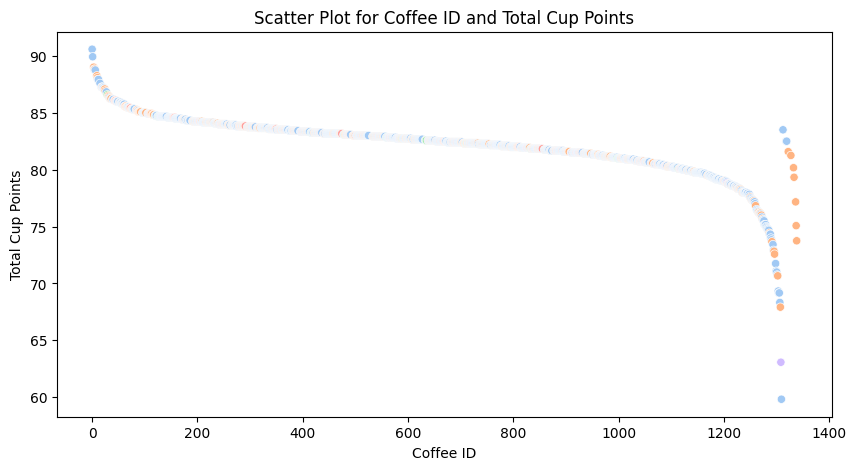

In [ ]:
plt.figure(figsize=(10, 5))

sns.scatterplot(x="Coffee_id", y="Total.Cup.Points", hue='Processing.Method', data=data, palette='pastel', legend=False)

plt.title('Scatter Plot for Coffee ID and Total Cup Points')
plt.xlabel('Coffee ID')
plt.ylabel('Total Cup Points')
plt.show()

c:\Users\oviya\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 21.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


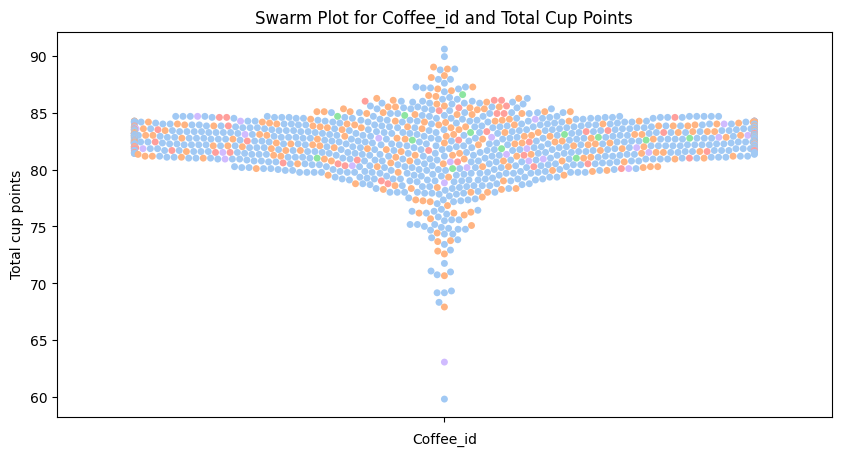

In [124]:
plt.figure(figsize=(10, 5))

sns.swarmplot(y="Total.Cup.Points", hue='Processing.Method', data=data, palette='pastel', legend=False)

plt.title('Swarm Plot for Coffee_id and Total Cup Points')
plt.xlabel('Coffee_id')
plt.ylabel('Total cup points')
plt.show()

In [134]:
# Find and remove outliers that were shown in the graphs above
print(data.shape)

coffee_ids_to_remove = np.where(data['Total.Cup.Points'] < 65)[0]
data.drop(index=coffee_ids_to_remove, inplace=True)

print(data.shape)

(1339, 44)
(1336, 44)


In [136]:
#Final dataset description
data.describe()

,Coffee_id,Number.of.Bags,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
count,1336.000000,1336.000000,1336.000000,1336.000000,1336.000000,1336.000000,1336.000000,1336.000000,1336.000000,1336.000000,1336.000000,1336.000000,1336.000000,1336.000000,1336.000000,1335.000000,1336.000000,1106.000000,1106.000000,1106.000000
mean,667.562874,153.705838,7.572657,7.527395,7.407972,7.542208,7.524087,7.525352,9.846482,9.851707,9.873338,7.510614,82.182186,0.088316,0.479790,0.173783,3.556138,1751.920205,1800.686584,1776.303395
std,385.921174,129.596219,0.316023,0.339846,0.348741,0.317430,0.306515,0.350901,0.471313,0.668573,0.491712,0.424965,2.565820,0.048319,2.552439,0.833016,5.318175,8681.166680,8680.523886,8680.347621
min,0.000000,0.000000,5.080000,6.080000,6.170000,5.250000,5.080000,5.250000,6.000000,0.000000,6.000000,5.170000,67.920000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,333.750000,14.000000,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,10.000000,10.000000,7.250000,81.170000,0.090000,0.000000,0.000000,0.000000,1100.000000,1100.000000,1100.000000
50%,667.500000,168.500000,7.580000,7.580000,7.420000,7.580000,7.500000,7.500000,10.000000,10.000000,10.000000,7.500000,82.500000,0.110000,0.000000,0.000000,2.000000,1310.640000,1350.000000,1310.640000
75%,1001.250000,275.000000,7.750000,7.750000,7.602500,7.750000,7.670000,7.750000,10.000000,10.000000,10.000000,7.750000,83.670000,0.120000,0.000000,0.000000,4.000000,1600.000000,1650.000000,1600.000000
max,1338.000000,1062.000000,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.000000,10.000000,10.000000,90.580000,0.280000,63.000000,11.000000,55.000000,190164.000000,190164.000000,190164.000000
